In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## 統計の基礎    
**統計**(statistics)は、標本を調べることで母集団の性質を明らかにすることを目的として、個々の要素を標本化(サンプリング、sampling)してこれを分析し、母集団の性質を数量的に表すことである。本章では、必要最低限の統計として推定・検定について説明する

### 統計とは   
**母集団(population)**の特徴を表すのが**母数(parameter)** $\theta$である。母数は**母平均($\mu$) (population mean)**, **母分散($\sigma^2$) (population variance)**などいくつか候補がある。      
母集団が全てを知ることができない場合にはこれらの要素をいくつが抽出する。これを**標本化(sampling)**といい、得られた物を**標本(sample)**という。この標本に対してなんらかの分析を行い母数を推定することを**統計(statistics)**である。    
標本から計算される数値(標本平均、標本標準偏差など)を**統計量(statictic)**という。標本は母集団の一部であるので統計量を通して母数を推定していく。   

### 推定    
標本から得られた統計量をもとにして、母数の存在する範囲を求めることを**統計的推定(statistical inference)**という。推定には一つの値を推定する**点推定**と範囲を指定する**区間推定**がある。    

#### 点推定
**点推定(point estimation)**とは、母集団の母数を一つの値で推定する方法である。点推定の望ましい性質として不偏性、一致性、有効性がよく用いられる。    
    
##### 不偏推定量     
不偏性とは推定量$\hat{\theta}$の期待値が母数$\theta$に一致することである。すなわち
$$
E[\hat{\theta}] = \theta
$$
が成立する時推定量$\hat{\theta}$を**不偏推定量(unbiased estimator)**と呼ぶ。この性質を持つとき、$\theta$の周りに$\hat{\theta}$が分布する。    
(推定値が真値より大きめに推定されやすかったり少なめに推定されやすいことはない)       
(推定量がどれだけ真値に近づくかについては一致性である)     
母平均$\mu$と母分散$\sigma^2$の点推定として、標本平均$\hat{\mu}$と標本分散$\hat{\sigma}^2$の計算式は次のように示される。     
$$
\hat{\mu} = \frac{1}{N} \displaystyle \sum_{i=1}^{N} x_i    \\
\hat{\sigma}^2 = \frac{1}{N-1} \displaystyle \sum_{i=1}^{N} (x_i - \hat{\mu})^2
$$
(標本分散では$N$で割るが不偏分散では不偏性を確保するのに$N-1$で割っていることに注意。証明は以下)       
     
標本平均の期待値については     
$$
\begin{align}
E[\hat{\mu}] &= \frac{1}{N} E[\displaystyle \sum_{i=1}^{N} x_i] \\
             &= \frac{1}{N}N \mu \\
             &= \mu
\end{align}
$$    
これより、標本平均は不偏推定量である。    
     
次に標本分散の期待値について考えると   
$$
\begin{align}
E[\hat{\sigma}^2] &= E[\frac{1}{N-1} \displaystyle \sum_{i=1}^{N} (x_i - \hat{\mu})^2] \\
                  &= \frac{1}{N-1}E[\displaystyle \sum_{i=1}^{N} \{ (x_i - \mu)^2 - (\hat{\mu} - \mu)^2 \}] \\  
                  &= \frac{1}{N-1} \{ E[\displaystyle \sum_{i=1}^{N}  (x_i - \mu)^2] - nE[(\hat{\mu} - \mu)^2 ] \} \\ 
                  &= \frac{1}{N-1} \{ E[\displaystyle \sum_{i=1}^{N}  (x_i - \mu)^2] - nV[\hat{\mu}] \} \\ 
                  &= \frac{1}{N-1}(N \sigma^2 - n \cdot \frac{\sigma^2}{n}) \\
                  &= \sigma^2
\end{align}
$$    

(中心極限定理より標本平均$\hat{\mu}$の分散$V[\hat{\mu}] = \frac{\sigma^2}{n}$となる)     
となり、$\hat{\sigma}^2$は不偏推定量となる。(標本分散の式で記述統計のNでわると不偏分散とならずやや少なめに算出されることがわかる)      

(array([ 0.,  0.,  1.,  1.,  0.,  3.,  4.,  9., 15., 15., 15.,  9.,  9.,
         8.,  5.,  3.,  1.,  1.,  1.,  0.]),
 array([1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ,
        2.05, 2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ]),
 <a list of 20 Patch objects>)

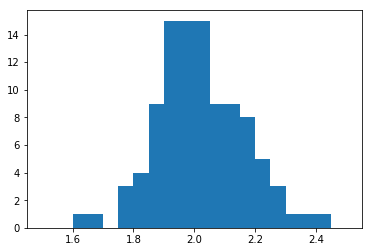

In [13]:
# 標本平均を実際に見てみる
# シードを1に設定
np.random.seed(1)  

# 母集団がmean = 2, std = 0.5の正規分布に従うと仮定
mean, std = 2, 0.5

# サンプル数Nの標本をnum個作成して標本平均のヒストグラムを作る
num = 100
N = 10

#  空ベクトルを作成
mu = np.zeros(num)

for i in range(num) : 
    mu[i] = np.mean(scipy.stats.norm.rvs(loc = mean, scale = std, size = N))

plt.hist(mu, bins = 20, range = (1.5, 2.5))

この結果から平均の予測値が与えられた真の平均値の周りに分布していることがわかる。    

##### 標本分散の自由度     
確率変数の$自由度(degree of freedom, DoF)$とは、大雑把にはいくつの変数を勝手に(自由に)その値を動かしていいかを測る指標である。    
例えば、標本$\{ x_i \}, (i = 1 \sim N)$に対して、$N=1$であってもこの標本平均は計算できる。すなわち、$N$個の標本を自由にしても良いから自由度は$N$と言える。   
次に標本分散の計算式を考えると$N = 1$では標本分散は0となり、意味を持たない。最低$N \geq 2$でないと標本分散は計算できない。よって標本数のうち一つは自由に使うことはできず、標本分散の自由度は$N-1$となる。   

##### 一致性    
標本の数が増えるに従って$\hat{\theta}$は対応する母数に近づくことが望ましい。つまり    
$$
\lim_{N \to \infty} P(|\hat{\theta}_N - \theta| < \varepsilon) = 1
$$
このような$\hat{\theta}$を**一致推定量(consistent estimator)**という。
    
標本平均は一致推定量であり、標本平均の分散を考えると    
$$
E[(\hat{\mu} - \mu)^2] = \frac{1}{N}\sigma^2
$$
これにより$N \to \infty$とともに0となるから、一致推定量となる。

#### 区間推定     
標本平均や標本分散は母平均や母分散の周りに分布するが、それらがどれくらいの確率でどれほどの区間に収まるかを考えるのが**区間推定(interval estimation)**という。この考えに対する指標の一つとして信頼区間がある。    
      
##### 信頼区間(confidence interval)     
信頼区間は$(1-\alpha)$の確率(または信頼度)で真の母数の値$\theta$が区間$[L, U]$に入る区間のことという。つまり    
   
$$
P(L \leq \theta \leq U) = 1 - \alpha
$$   
(この程度の区間をとれば、何回もsamplingを繰り返したとき$1-\alpha$の確率で区間内に真値$\theta$が存在する)    
ここに、$L, U$はそれぞれ**下側信頼限界(lower confidence limit)**、**上側信頼限界(upper confidence limit)**、$1-\alpha$は**信頼度(confidence level)**、区間$[L, U]$を**$100(1-\alpha)$信頼区間**と呼ぶ。    
       
$1-\alpha$は目的に応じて適切な値が選ばれるが、通常は$0.90, 0.95, 0.99$が選ばれることが多く、$\alpha$はそれぞれ$0.10, 0.05, 0.01$となる。   
また確率分布が正規分布のような左右対称の場合は信頼区間$[L, U]$をパーセント点の表記$[-z_{\alpha/2}, z_{\alpha/2}]$に置き換えて考える。   

In [16]:
# 標準正規分布における99%信頼区間を考える
# alpha = 0.01(99%信頼区間)
alpha = 0.01  

# 標準正規分布の90%信頼区間を出す
za, zb = scipy.stats.norm.interval(alpha = (1 - alpha), loc = 0, scale = 1)

print("za = ", za, ", zb =", zb)

za =  -2.5758293035489004 , zb = 2.5758293035489004
